# TP 1 - K-Anonymity / L-Diversity - T-closenss
**Binôme Stéphanie ROUXEL / Hy-Boui CHANG**

Juillet 2020

![Le logo de Framasoft](https://s3-eu-west-1.amazonaws.com/groupe-carton/posts/homogenes-ou-heterogenes-comment-jugeons-nous-les-groupes-de-personnes-qui-nous-rejettent_779x300.jpeg "generalisation des attributs")

# K-Anonymity + L-Diversity + T-Closeness

In the late 1990s Sweeney published several articles in which she proposed the concept of k-anonymity. Among them we cite the most famous one [1] published in 2002. At the time when anonymization was referring to the concept now known as depseudonymization. As we already discusses pseudonymization is the replacement of all directly identifying data (such as the social security number) with a random value (pseudonym). Sweeney showed in [1] that it was possible to re-identify a pseudonymized relational database (SQL or more generally a tabular file) and proposed a simple notion to prevent these kind of leak from hapenning.

## K-Anonymity

Let us suppose that we have a dataset that contains $N$ entries.
Each entry consists of a list of $D$ attributes $X_i$ ($i \in [0,D]$) that contain (non-sensitive) information about a person, such as age, gender, zip code of residence, etc. These attributes are called "quasi-identifiers", as combining several of them into a "super-identifier" can often uniquely identify a person even in large datasets (e.g. the combination of gender, age and zip code might be so specific that only a single person in a dataset has a given combination see [1] for more details).

k-anonymity protects the privacy of individual persons by pooling their attributes into groups of at least $k$ people. In addition, the model assumes that the dataset contains a single sensitive attribute that contains e.g. information about a person's income and that we want to protect. The method can also be generalized to datasets with more than one sensitive attribute or datasets where there's no clear distinction between quasi-identifiers and sensitive attributes. For this case study we will look at the simple case though. Now, k-anonymity demands that we group individual rows/persons of our dataset into group of at least $k$ rows/persons and replace the quasi-identifier attributes of these rows with aggregate quantities, such that it is no longer possible to read the individual values. This protects people by ensuring that an adversary who knows all values of a person's quasi-identifier attributes can only find out which group a person might belong to but not know if the person is really in the dataset.

The main advantage of k-anonymity is that it is easy to understand. However, the model is not robust when the sensitive values associated with a given quasi-identifier value are all identical. In this case, we can deduce that all people with this quasi-identifier value have the same sensitive data, which we are able to deduce. It is therefore impossible to ensure that the risk of re-dentification is limited, which means that a use of k-anonymity alone does not offer reasonable guarantees of anonymity. This problem can be fixed by using an extension of k-anonymity called "l-diversity".

## L-Diversity 

l-diversity, first introduced in 2007 in [2], ensures that each k-anonymous group contains at least l different values of the sensitive attribute. Therefore, even if an adversary can identify the group of a person he/she still would not be able to find out the value of that person's sensitive attribute with certainty. However, even when using l-diversity an adversary could still learn some information about a person's sensitive attribute using probabilistic reasoning: If, for example, 4 out of 5 people in a 5-anonymous group possess a given value of the sensitive attribute, an attacker can reason that a given person who he/she knows is part of the group will -with high probability- possess that value.
Again, this problem can be fixed by extending k-anonymity using a so-called "t-closeness" criterion. 

## T-Closeness

t-closeness, also introduced in 2007 in [3], demands that the statistical distribution of the sensitive attribute values in each k-anonymous group is "close" to the overall distribution of that attribute in the entire dataset. Typically, the closeness between two probability vectors $p=(p_1,...,p_l)$ and $q=(q_1,...,q_l)$ can be measured using e.g. the Kullback-Leibler (KL) divergence defined as follows: $$ D_{KL}(p,q) = \sum_{i=1}^{l}p_i \log(\frac{p_i}{q_i}).$$
An adversary could then only learn a limited amount of information from comparing the distribution of the values in the group to the distribution in the entire dataset.

Then begins to ask the question of the usefulness of the data. Due to proximity constraints, the data does not necessarily seem directly usable. However, it is still possible to identify trends, or perform general calculations or correlations on the whole table.
Of course, k-anonymity, l-diversity and t-closeness all limit the amount of information that a legitimate user can learn from the data as well, so typically we need to balance the degree of privacy against the utility of the resulting data. Eventhough the data does not necessarily seem directly usable. However, it is still possible to identify trends, or perform general calculations or correlations on the whole table.

## Implementing privacy conditions

Turning a dataset into a k-anonymous (and possibly l-diverse or t-close) dataset is a complex problem. Meyerson and Williams have shown in [4] that finding the optimal transformation of the database NP-difficult. Fortunately, several practical algorithms exists that often produce "good enough" results by employing greedy search techniques.

In this notebook, we will explore the so-called "Mondrian" (see [5] for more details) algorithm, which uses a greedy search method to partition the original data into smaller and smaller groups. The algorithm assumes that we have converted all attributes into numerical or categorical values and that we're able to measure the "span" of a given data attribute $X_i$ ("span" will be detailed later).

### Partitioning

The algorithm proceeds then as follows to partition the data into k groups:

1. Initialize the final set of partitions to an empty set $P_{final} = \{\}$.
2. Initialize the temporary set of paritions to a set containing a partition with the entire dataset $P_{temp} = \{\{1, 2,\dots ,N\}\}$.
4. While there are partitions in the temporary set, pop one partition from it.
  * Calculate the relative spans of all columns in the partition.
  * Sort the resulting columns by their span (in descending order) and iterate over them. For each column,
      * Try to split the partition along that column using the median of the column values as the split point.
      * Check if the resulting partitions are valid according to k-anonymity (and possibly additional) criteria.
      * If yes, add the two new partitions to the temporary set and break out of the loop.
  * If no column produced a valid split, add the original partition to the set of final partitions.
5. Return the final set of partitions

### Data Aggregation

After obtaining the partitions we still need to aggregate the values of the quasi identifiers and the sensitive attributes in each k-anonymous group. For this, we can e.g. replace numerical attributes with their range (e.g. "age: 24-28") and categorical attributes with their union (e.g. "employment-group: [self-employed, employee, worker]"), though other aggregations are possible. An open source tool developed by the Technological University of Munich, ARX (see [6]) allows anonymisation according to many models from original data in tabular format. The tool also makes it possible to estimate the risks of de-anonymization according to the models presented above, and even in a finer way by calculating the distribution of the probabilities of de-anonymization and not simply the maximum values.

## Biliography

- [1] [k-Anonymity: A Model For Protecting Privacy](https://epic.org/privacy/reidentification/Sweeney_Article.pdf)
- [2] [l-Diversity: Privacy Beyond k-Anonymity](https://personal.utdallas.edu/~muratk/courses/privacy08f_files/ldiversity.pdf)
- [3] [t-Closeness: Privacy Beyond k-Anonymity and l-Diversity](https://www.cs.purdue.edu/homes/ninghui/papers/t_closeness_icde07.pdf)
- [4] [On the Complexity of Optimal K-Anonymity](http://www.aladdin.cs.cmu.edu/papers/pdfs/y2004/kanonim.pdf)
- [5] [Mondrian - Multidimensional k-Anonymity](https://www.utdallas.edu/~muratk/courses/privacy08f_files/MultiDim.pdf)
- [6] [Putting statistical disclosure control into practice: The ARX data anonymization tool](https://link.springer.com/chapter/10.1007/978-3-319-23633-9_6)


In [ ]:
# we use Pandas to work with the data as it makes working with categorical data very easy
import pandas as pd

In [ ]:
# this is a list of the column names in our dataset (as the file doesn't contain any headers)
names = (
    'age',
    'workclass', #Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    'fnlwgt', # "weight" of that person in the dataset (i.e. how many people does that person represent) -> https://www.kansascityfed.org/research/datamuseum/cps/coreinfo/keyconcepts/weights
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
)

# some fields are categorical and will require special treatment
categorical = set((
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'sex',
    'native-country',
    'race',
    'income',
))
df = pd.read_csv("data/adult.all.txt", sep=", ", header=None, names=names, index_col=False, engine='python');# We load the data using Pandas

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50k
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50k
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50k
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50k
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50k


In [ ]:
for name in categorical:
    df[name] = df[name].astype('category')

## Exercise

**Implement a function that returns the spans (max-min for numerical columns, number of different values for categorical columns) of all columns for a partition of a dataframe.** 

In [ ]:
# hbc 
df.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
income            category
dtype: object

In [ ]:
def get_spans(df, partition, scale=None):
    """
    :param        df: the dataframe of reference
    :param partition: the partition for which to calculate the spans
    :param     scale: if given, the spans of each column will be divided
                      by the value in `scale` for that column
    :        returns: The spans of all columns in the partition
    """
    
    sortie={}

    for col in df.columns :
        
        if df[col][partition].dtypes=='int64' :
            sortie[col]=((max(df[col][partition])-min(df[col][partition])))
        else:
            sortie[col]=(len(df[col][partition].unique()))

        if scale is not None:
            sortie[col]=sortie[col]/scale[col]
            
    return sortie

# si la colonne est une colonne numérique, alors le SPAN est l'amplitude des données,
# on calcule le span en faisant une soustraction entre la valeur max et la valeur min

# si la colonne est une colonne de catégorie, alors le SPAN est le nbre de catégories uniques

In [ ]:
full_spans = get_spans(df, df.index)
full_spans

{'age': 73,
 'workclass': 9,
 'fnlwgt': 1478115,
 'education': 16,
 'education-num': 15,
 'marital-status': 7,
 'occupation': 15,
 'relationship': 6,
 'race': 5,
 'sex': 2,
 'capital-gain': 99999,
 'capital-loss': 4356,
 'hours-per-week': 98,
 'native-country': 42,
 'income': 2}

In [ ]:
# hbc
# la méthode items() sur un dictionnaire, permet de récupérer les clefs et valeurs associées sous forme de tuples

full_spans.items()

dict_items([('age', 73), ('workclass', 9), ('fnlwgt', 1478115), ('education', 16), ('education-num', 15), ('marital-status', 7), ('occupation', 15), ('relationship', 6), ('race', 5), ('sex', 2), ('capital-gain', 99999), ('capital-loss', 4356), ('hours-per-week', 98), ('native-country', 42), ('income', 2)])

In [ ]:
# hbc
# la méthode sorted va nous être utile pour trier les colonnes selon le span, en ordre décroissant
# x[0] représente la clée
# x[1] représente la valeur du span
# -x[1] pour un tri décroissant (du plus grand au plus petit)

sorted(full_spans.items(), key=lambda x:-x[1])

[('fnlwgt', 1478115),
 ('capital-gain', 99999),
 ('capital-loss', 4356),
 ('hours-per-week', 98),
 ('age', 73),
 ('native-country', 42),
 ('education', 16),
 ('education-num', 15),
 ('occupation', 15),
 ('workclass', 9),
 ('marital-status', 7),
 ('relationship', 6),
 ('race', 5),
 ('sex', 2),
 ('income', 2)]

## Exercise

**Implement a `split` function that takes a dataframe, a current partition and a column as inputs and returns two ensembles that split the given partition such that all rows with values of the column `column` below the median are in one ensemble and all rows with values above or equal to the median are in the other.**

In [ ]:
def split(df, partition, column):
    """
    :param        df: The dataframe of reference
    :param partition: The partition to split
    :param    column: The column along which to split
    :        returns: A tuple containing a split of the original partition
    """
      
    indexA=[]
    indexB=[]
    
    partie = df[column][partition]
    
    if partie.dtypes=='int64' :
        med=partie.median()
        indexA=partie.index[partie<med]
        indexB=partie.index[partie>=med]
            
    else:
        cat=partie.unique()
        L=len(cat)
        A = set(cat[:L//2])
        B = set(cat[L//2:])
        indexA=partie.index[partie.isin(A)]
        indexB=partie.index[partie.isin(B)]
        
    return (indexA, indexB)

# Cette fonction SPLIT permet de diviser en 2 les données, en analysant les données d'une colonne particulière

# si cette colonne est numérique, alors on fait une division des données en utilisant la médian
# on obtient nos 2 groupes

# si cette colonne est une liste de catégorie, alors on prend la liste des catégories
# on divise cette liste en 2 sous listes
# pour chaque sous liste, on associe les données
# on obtient nos 2 groupes


In [ ]:
# hbc
# split(df, df["age"][2:1000], "age")
split(df, df.index, "age")
split(df, df.index, "workclass")

(Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                 9,
             ...
             48829, 48830, 48831, 48832, 48833, 48834, 48836, 48837, 48839,
             48840],
            dtype='int64', length=41181),
 Int64Index([   25,    27,    30,    54,    61,    68,    69,    77,    79,
                86,
             ...
             48794, 48800, 48811, 48812, 48816, 48818, 48826, 48835, 48838,
             48841],
            dtype='int64', length=7661))

## Exercise

Now that we have all helper functions in place, we can implement the partition algorithm discussed above:

**Implement the partitioning algorithm discussed above, using a k-anonymous criterion for the partitions you create.**

In [ ]:
def is_k_anonymous(df, partition, sensitive_column, k=3):
    """
    :param               df: The dataframe on which to check the partition.
    :param        partition: The partition of the dataframe to check.
    :param sensitive_column: The name of the sensitive column
    :param                k: The desired k
    :returns               : True if the partition is valid according to our k-anonymity criteria, False otherwise.
    """
    if len(partition)>=k:
        return True
    else :
        return False
    
# la vérification de la k-anonymité revient simplement à vérifier qu'il y a bien k éléments dans la partition
# d'où le calcul de la longueur de la partition obtenue



In [ ]:
def partition_dataset(df, feature_columns, sensitive_column, scale, is_valid):
    """
    :param               df: The dataframe to be partitioned.
    :param  feature_columns: A list of column names along which to partition the dataset.
    :param sensitive_column: The name of the sensitive column (to be passed on to the `is_valid` function)
    :param            scale: The column spans as generated before.
    :param         is_valid: A function that takes a dataframe and a partition and returns True if the partition is valid.
    :returns               : A list of valid partitions that cover the entire dataframe.
    """
    # initialisation de la liste des partitions, qui sera celle retournée au final
    setOfPartitionsFinal = []
    
    # initialisation de la liste des partitions, qui est au départ l'emsemble des données
    partitions = [df.index]
    
    # grande boucle
    
    while partitions:

        partition = partitions.pop(0)
        
        # on calcule l'ensemble des spans sur des données réduites aux features demandées
        listingSpans = get_spans(df[feature_columns], partition, scale)
        
        # ici, on trie en ordre décroissant la liste de spans obtenue
        # x[1] représentent les valeurs de spans
        # -x[1] pour un ordre décroissant
        listingSpansOK=sorted(listingSpans.items(), key=lambda x : -x[1])
        
        # petite boucle
        
        # on applique la fonction Split précédemment implémentée
        for column, span in listingSpansOK :
            indexA, indexB = split(df, partition, column)
            
            # is_valid est une fonction, elle représente le résutat de la fonction is_k_anonymous
            # on vérifie que le critère de k-anonymité est vérifié pour les 2 index
            if not is_valid(df, indexA, sensitive_column) or not is_valid(df, indexB, sensitive_column):
                continue
            
            # si le critère de k-anonymité est vérifié, on split bien en 2 groupes d'index nos données
            partitions.extend((indexA, indexB))
            
            break
            
        else:
            
            setOfPartitionsFinal.append(partition)
            
    return setOfPartitionsFinal

Now let's try this on our dataset! To keep things simple, we will at first select only two columns from the dataset that we apply the partitioning to. This makes it easier to check/visualize the result and speed up the execution (the naive algorithms can take several minutes when running on the entire dataset) 

In [ ]:
# we apply our partitioning method to two columns of our dataset, using "income" as the sensitive attribute
feature_columns = ['age', 'hours-per-week']
sensitive_column = 'income'
final_partitions = partition_dataset(df, feature_columns, sensitive_column, full_spans, is_k_anonymous)

In [ ]:
# we get the number of partitions that were created
len(final_partitions)

605

In [ ]:
# hbc
final_partitions

[Int64Index([    8,    13,    17,    40,    61,    71,    79,    99,   105,
               108,
             ...
             48701, 48727, 48746, 48752, 48755, 48778, 48805, 48810, 48830,
             48833],
            dtype='int64', length=2202),
 Int64Index([   15,    87,    94,   151,   152,   177,   179,   185,   233,
               268,
             ...
             48671, 48675, 48679, 48699, 48705, 48754, 48757, 48779, 48792,
             48836],
            dtype='int64', length=2222),
 Int64Index([   22,    57,    65,   114,   128,   165,   196,   198,   207,
               212,
             ...
             48742, 48743, 48747, 48758, 48764, 48772, 48774, 48789, 48819,
             48841],
            dtype='int64', length=2321),
 Int64Index([    5,    10,    91,    97,   133,   184,   211,   215,   265,
               296,
             ...
             48457, 48480, 48489, 48500, 48574, 48712, 48740, 48767, 48793,
             48803],
            dtype='int64', length=109

Let's visualize the created partitions! To do that, we will write functions to get the rectangular bounds of a partition along two columns. We can then plot these rectangles to see how our partitioning function divides the dataset. If we perform the partition only along the two columns selected for plotting then the resulting rectangles should not overlap and cover the entire dataset.

In [ ]:
import matplotlib.pylab as pl
import matplotlib.patches as patches

In [ ]:
def build_indexes(df):
    indexes = {}
    for column in categorical:
        values = sorted(df[column].unique())
        indexes[column] = { x : y for x, y in zip(values, range(len(values)))}
    return indexes

In [ ]:
# hbc
# cette fonction permet de rendre numérique les colonnes de catégories
# par exemple, pour la colonne "race", il y a 4 valeurs possibles, et ces quatre valeurs sont représentés par 1, 2, 3, 4.
# de même, pour la colonne "sex", on substitue 0 à Female, et 1 à Male

indexes = build_indexes(df)
indexes

{'race': {'Amer-Indian-Eskimo': 0,
  'Asian-Pac-Islander': 1,
  'Black': 2,
  'Other': 3,
  'White': 4},
 'sex': {'Female': 0, 'Male': 1},
 'workclass': {'?': 0,
  'Federal-gov': 1,
  'Local-gov': 2,
  'Never-worked': 3,
  'Private': 4,
  'Self-emp-inc': 5,
  'Self-emp-not-inc': 6,
  'State-gov': 7,
  'Without-pay': 8},
 'native-country': {'?': 0,
  'Cambodia': 1,
  'Canada': 2,
  'China': 3,
  'Columbia': 4,
  'Cuba': 5,
  'Dominican-Republic': 6,
  'Ecuador': 7,
  'El-Salvador': 8,
  'England': 9,
  'France': 10,
  'Germany': 11,
  'Greece': 12,
  'Guatemala': 13,
  'Haiti': 14,
  'Holand-Netherlands': 15,
  'Honduras': 16,
  'Hong': 17,
  'Hungary': 18,
  'India': 19,
  'Iran': 20,
  'Ireland': 21,
  'Italy': 22,
  'Jamaica': 23,
  'Japan': 24,
  'Laos': 25,
  'Mexico': 26,
  'Nicaragua': 27,
  'Outlying-US(Guam-USVI-etc)': 28,
  'Peru': 29,
  'Philippines': 30,
  'Poland': 31,
  'Portugal': 32,
  'Puerto-Rico': 33,
  'Scotland': 34,
  'South': 35,
  'Taiwan': 36,
  'Thailand': 37,


In [ ]:
def get_coords(df, column, partition, indexes, offset=0.1):
    if column in categorical:
        sv = df[column][partition].sort_values()
        l, r = indexes[column][sv[sv.index[0]]], indexes[column][sv[sv.index[-1]]]+1.0
    else:
        sv = df[column][partition].sort_values()
        next_value = sv[sv.index[-1]]
        larger_values = df[df[column] > next_value][column]
        if len(larger_values) > 0:
            next_value = larger_values.min()
        l = sv[sv.index[0]]
        r = next_value
    # we add some offset to make the partitions more easily visible
    l -= offset
    r += offset
    return l, r

In [ ]:

def get_partition_rects(df, partitions, column_x, column_y, indexes, offsets=[0.1, 0.1]):
    rects = []
    for partition in partitions:
        xl, xr = get_coords(df, column_x, partition, indexes, offset=offsets[0])
        yl, yr = get_coords(df, column_y, partition, indexes, offset=offsets[1])
        rects.append(((xl, yl),(xr, yr)))
    return rects

def get_bounds(df, column, indexes, offset=1.0):
    if column in categorical:
        return 0-offset, len(indexes[column])+offset
    return df[column].min()-offset, df[column].max()+offset

In [ ]:
feature_columns

['age', 'hours-per-week']

In [ ]:
# hbc

column_x, column_y = feature_columns[:2]
print(column_x)
print(column_y)

age
hours-per-week


In [ ]:
# we calculate the bounding rects of all partitions that we created
indexes = build_indexes(df)
column_x, column_y = feature_columns[:2]
rects = get_partition_rects(df, final_partitions, column_x, column_y, indexes, offsets=[0.0, 0.0])

In [ ]:
len(rects)

605

In [ ]:
# let's see how our rectangles look like
rects[:10]

[((31.0, 40.0), (33.0, 99.0)),
 ((33.0, 40.0), (35.0, 99.0)),
 ((35.0, 40.0), (37.0, 99.0)),
 ((37.0, 40.0), (38.0, 99.0)),
 ((41.0, 40.0), (43.0, 99.0)),
 ((47.0, 40.0), (49.0, 99.0)),
 ((21.0, 40.0), (22.0, 99.0)),
 ((24.0, 40.0), (25.0, 99.0)),
 ((25.0, 40.0), (26.0, 99.0)),
 ((26.0, 40.0), (27.0, 99.0))]

In [ ]:
# we plot the rectangles
def plot_rects(df, ax, rects, column_x, column_y, edgecolor='black', facecolor='none'):
    for (xl, yl),(xr, yr) in rects:
        ax.add_patch(patches.Rectangle((xl,yl),xr-xl,yr-yl,linewidth=1,edgecolor=edgecolor,facecolor=facecolor, alpha=0.5))
    ax.set_xlim(*get_bounds(df, column_x, indexes))
    ax.set_ylim(*get_bounds(df, column_y, indexes))
    ax.set_xlabel(column_x)
    ax.set_ylabel(column_y)

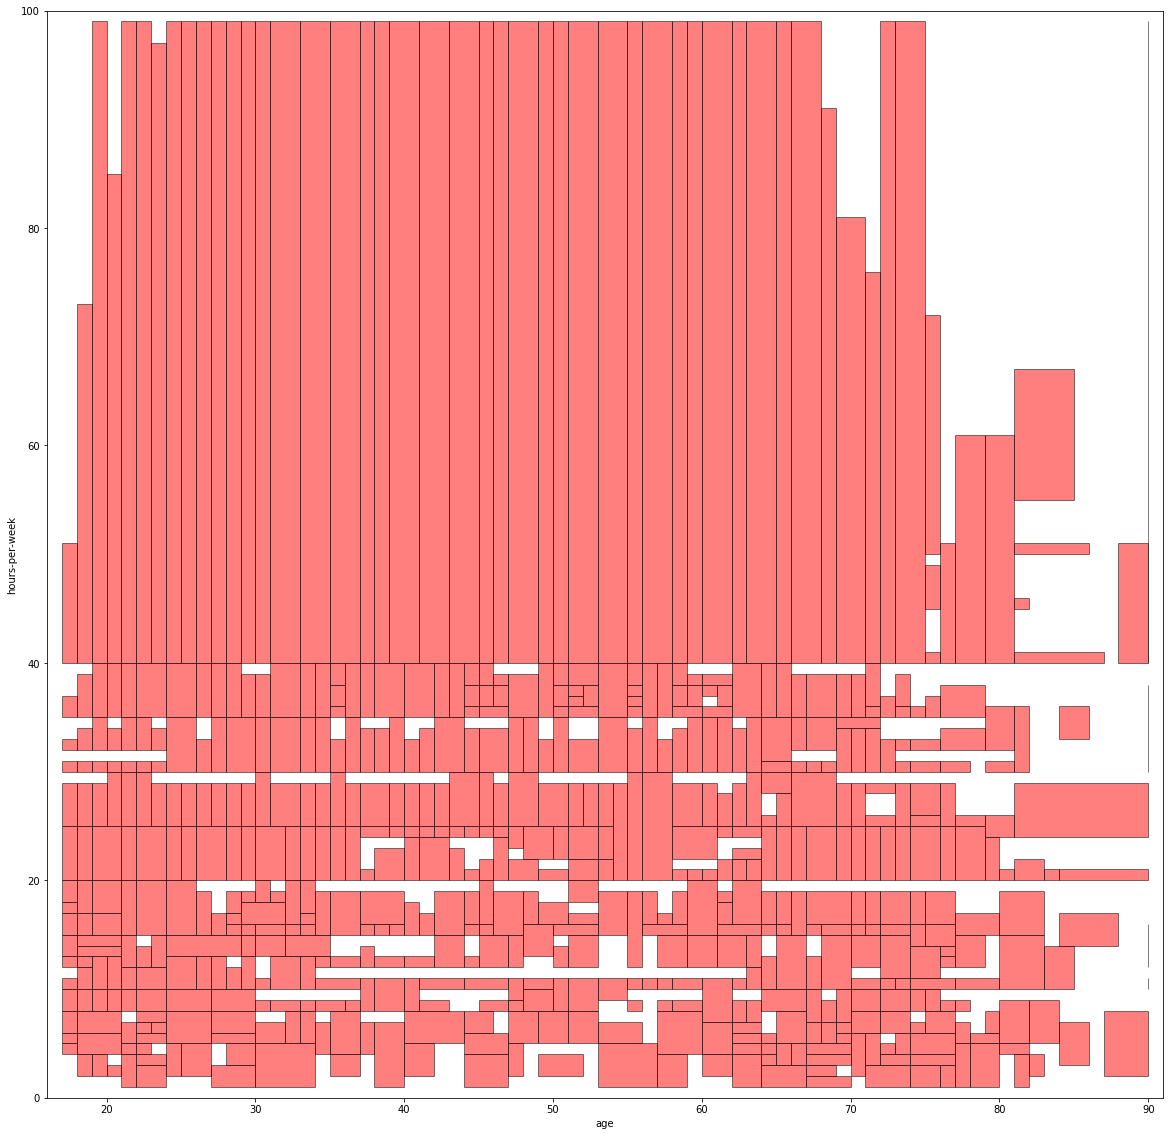

In [ ]:
pl.figure(figsize=(20,20))
ax = pl.subplot(111)
plot_rects(df, ax, rects, column_x, column_y, facecolor='r')
#pl.scatter(df[column_x], df[column_y])

**Brifely analyze the result we get.**

On visualise ici nos 605 partitions ==> représentées par chaque rectangle.
Les zones blanches signifient qu'il n'y a pas de données.

On voir qu'il y a des partitions plus grandes que d'autres. Notamment, au dessus de 40h, les rectangles sont plus larges. Cela ne signifie pas spécialement qu'il y a davantage d'individus. 
Par ailleurs, nous ne connaisons pas, à ce stade, la diversité dans chacune de ces partitions. La suite du TP devrait nous apporter des réponses complémentaires.


# Generating an k-Anonymous Dataset

Of course, to use the data we want to produce a new dataset that contains one row for each partition and value of the sensitive attribute. To do this, we need to aggregate the columns in each partition.  Let's do this!

In [ ]:
def agg_categorical_column(series):
    return [','.join(set(series))]

def agg_numerical_column(series):
    return [series.mean()]

In [ ]:
def build_anonymized_dataset(df, partitions, feature_columns, sensitive_column, max_partitions=None):
    aggregations = {}
    for column in feature_columns:
        if column in categorical:
            aggregations[column] = agg_categorical_column
        else:
            aggregations[column] = agg_numerical_column
    rows = []
    for i, partition in enumerate(partitions):
        if i % 100 == 1:
            print("Final {} partitions...".format(i))
        if max_partitions is not None and i > max_partitions:
            break
        grouped_columns = df.loc[partition].agg(aggregations, squeeze=False)
        sensitive_counts = df.loc[partition].groupby(sensitive_column).agg({sensitive_column : 'count'})
        values = grouped_columns.iloc[0].to_dict()
        for sensitive_value, count in sensitive_counts[sensitive_column].items():
            if count == 0:
                continue
            values.update({
                sensitive_column : sensitive_value,
                'count' : count,

            })
            rows.append(values.copy())
    return pd.DataFrame(rows)

In [ ]:
dfn = build_anonymized_dataset(df, final_partitions, feature_columns, sensitive_column)

Final 1 partitions...
Final 101 partitions...
Final 201 partitions...
Final 301 partitions...
Final 401 partitions...
Final 501 partitions...
Final 601 partitions...


In [ ]:
# we sort the resulting dataframe using the feature columns and the sensitive attribute
dfn.sort_values(feature_columns+[sensitive_column])

,age,hours-per-week,income,count
238,17.0,4.000000,<=50k,4
239,17.0,5.000000,<=50k,9
241,17.0,6.357143,<=50k,14
242,17.0,8.136364,<=50k,22
121,17.0,10.000000,<=50k,35
...,...,...,...,...
888,90.0,13.500000,<=50k,3
889,90.0,13.500000,>50k,1
948,90.0,34.250000,<=50k,4
918,90.0,47.027027,<=50k,25


Jusqu'ici, on agrége les données par colonne.
- pour les données numériques, on affiche la valeur moyenne (mean) pour une même partition.
- pour les données catégorie, on affiche une suite de texte qui est la suite des classes possibles

Sur la première ligne du résultat donnée par le code précédent, on lit âge = 17 ans, et 4 heures de travail par semaine. on a 4 individus ==> ces 4 individus ont la même valeur de données sensibles. Cela est problématique car il est très facile de retrouver leur revenu en connaissant leur âge et le nbre d'heures travaillées par semaine.

Alors que pour les lignes 888 et 889, la partition est séparée en 2 avec 3 individus en ligne888 et 1 en ligne 889 ==> Cela permet de laisser le doute sur la donnée sensible.


Autre remarque : il est tout à fait normal d'avoir 965 lignes ici, et 605 partitions (rectangles oranges). En effet, une partition peut être restituée en 2 lignes suivant la valeur de la donnée sensible (>50K€ ou <= 50 K€). Par exemple, les lignes 888 et 889.


# Implementing l-diversity (the naive way)

Now let's see how we can implement l-diversity in order to protect the privacy of the persons in the dataset even better. To implement l-diversity, we can do the following things:

* Modify our `is_valid` function to not only check for the size of a given partition but also ensure that the values of the sensitive attribute in the partition are diverse enough.
* Modify the `split` function to produce splits that are diverse (if possible)

Here we will only implement the first point to keep things simple, please keep in mind that this is not the smartest way to implement l-diversity, as our "naive" splitting function might produce invalid splits even when it would actually be possible to produce a valid one.

## Exercise

**Implement a validator function that returns `True` if a given partition contains at least `l` different values of the sensitive attribute, `False` otherwise.**

In [ ]:
def is_l_diverse(df, partition, sensitive_column, l=2):
    """
    :param               df: The dataframe for which to check l-diversity
    :param        partition: The partition of the dataframe on which to check l-diversity
    :param sensitive_column: The name of the sensitive column
    :param                l: The minimum required diversity of sensitive attribute values in the partition
    """
    
    # initialisation des variables
    NbUniqueVal=0
    
    # calcul du nombre de valeurs uniques
    NbUniqueVal=len(df[sensitive_column][partition].unique())
    
    # test de l-diversité
    if NbUniqueVal >= l:
        return True
    else :
        return False
    

In [ ]:
# now let's apply this method to our data and see how the result changes
final_l_diverse_partitions = partition_dataset(df, feature_columns, sensitive_column, full_spans, lambda *args: is_k_anonymous(*args) and is_l_diverse(*args))

In [ ]:
len(final_l_diverse_partitions)

337

In [ ]:
column_x, column_y = feature_columns[:2]
l_diverse_rects = get_partition_rects(df, final_l_diverse_partitions, column_x, column_y, indexes, offsets=[0.0, 0.0])

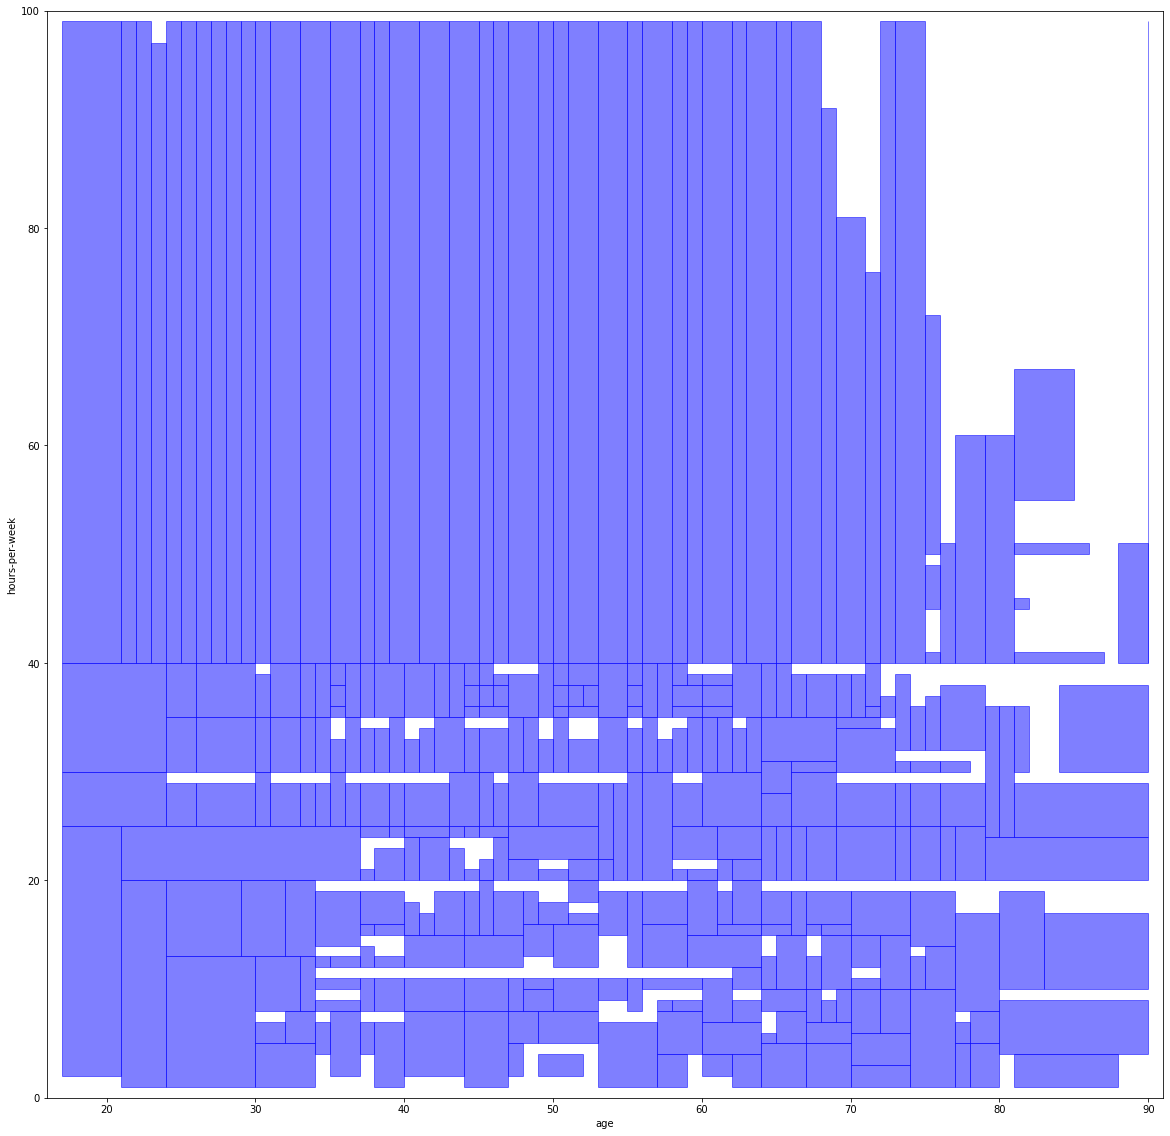

In [ ]:
pl.figure(figsize=(20,20))
ax = pl.subplot(111)
plot_rects(df, ax, l_diverse_rects, column_x, column_y, edgecolor='b', facecolor='b')

**Brifely analyze the result we get. Compare with simple k-anonymity**

Après application supplémentaire de la l-diversity, on obtient encore moins de partitions, c'est normal, puisqu'ici on a rajouté cette nouvelle condition.


In [ ]:
# again we build an anonymized dataset from the l-diverse partitions
dfl = build_anonymized_dataset(df, final_l_diverse_partitions, feature_columns, sensitive_column)

Final 1 partitions...
Final 101 partitions...
Final 201 partitions...
Final 301 partitions...


In [ ]:
# Let's see how l-diversity improves the anonymity of our dataset
dfl.sort_values([column_x, column_y, sensitive_column])

,age,hours-per-week,income,count
0,18.324658,16.302055,<=50k,1459
1,18.324658,16.302055,>50k,1
8,19.140051,42.293766,<=50k,1169
9,19.140051,42.293766,>50k,2
4,20.005780,25.341040,<=50k,518
...,...,...,...,...
639,87.571429,34.285714,>50k,1
648,88.166667,41.666667,<=50k,5
649,88.166667,41.666667,>50k,1
650,90.000000,47.027027,<=50k,25


# Implementing t-closeness

As we can see, for regions where the value diversity is low, our l-diverse method produces partitions that contain a very large number of entries for one value of the sensitive attribute and only one entry for the other value. This is not ideal as while there is "plausible deniability" for a person in the dataset (after all the person could be the one "outlier") but an adversary can still be very certain about the person's attribute value in that case.

t-closeness solves this problem by making sure that the distribution of sensitive attribute values in a given partition is similar to the distribution of the values in the overall dataset. We'll implement a naive (and not efficient / correct) version of t-closeness below. As with the l-diversity case, it would be better to tailor the `split` function to produce partitions that are t-close, which would increase the efficiency of the method.

## Exercise

**Implement a version of the `is_valid` function that returns `True` if the partition is diverse enough and `False` otherwise. To measure diversity, calculate the total variation distance (easier to implement compared to KL) between the empirical probability distribution of the sensitive attribute over the entire dataset vs. the distribution over
the partition. Hint: the total variation distance is the maximum pointwise absolute difference between the two distributions. You can assume that the sensitive attribute is a categorical value.**

In [ ]:
# here we generate the global frequencies for the sensitive column 
global_freqs = {}
total_count = float(len(df))
group_counts = df.groupby(sensitive_column)[sensitive_column].agg('count')
for value, count in group_counts.to_dict().items():
    p = count/total_count
    global_freqs[value] = p

In [ ]:
global_freqs

{'<=50k': 0.7607182343065395, '>50k': 0.23928176569346055}

In [ ]:
def is_t_close(df, partition, sensitive_column, global_freqs, p=0.2):
    """
    :param               df: The dataframe for which to check l-diversity
    :param        partition: The partition of the dataframe on which to check l-diversity
    :param sensitive_column: The name of the sensitive column
    :param     global_freqs: The global frequencies of the sensitive attribute values
    :param                p: The maximum allowed distance
    """
    # initialisation des variables
    total_count = float(len(partition))
    distMax = 0
    
    group_counts = df.loc[partition].groupby(sensitive_column)[sensitive_column].agg('count')
    for value, count in group_counts.to_dict().items():
        pourc = count/total_count
        dist = abs(pourc-global_freqs[value])
        if distMax < dist:
            distMax = dist
    
    if distMax <= p :
        return True
    else :
        return False



In [ ]:
# Let's apply this to our dataset
final_t_close_partitions = partition_dataset(df, feature_columns, sensitive_column, full_spans, lambda *args: is_k_anonymous(*args) and is_t_close(*args, global_freqs))

In [ ]:
len(final_t_close_partitions)

270

In [ ]:
dft = build_anonymized_dataset(df, final_t_close_partitions, feature_columns, sensitive_column)

Final 1 partitions...
Final 101 partitions...
Final 201 partitions...


In [ ]:
# Let's see how t-closeness fares
dft.sort_values([column_x, column_y, sensitive_column])

,age,hours-per-week,income,count
0,27.178020,38.975774,<=50k,20746
1,27.178020,38.975774,>50k,2948
158,37.000000,5.250000,<=50k,3
159,37.000000,5.250000,>50k,1
162,37.000000,9.333333,<=50k,2
...,...,...,...,...
515,87.571429,34.285714,>50k,1
524,88.166667,41.666667,<=50k,5
525,88.166667,41.666667,>50k,1
526,90.000000,47.027027,<=50k,25


In [ ]:
column_x, column_y = feature_columns[:2]
t_close_rects = get_partition_rects(df, final_t_close_partitions, column_x, column_y, indexes, offsets=[0.0, 0.0])

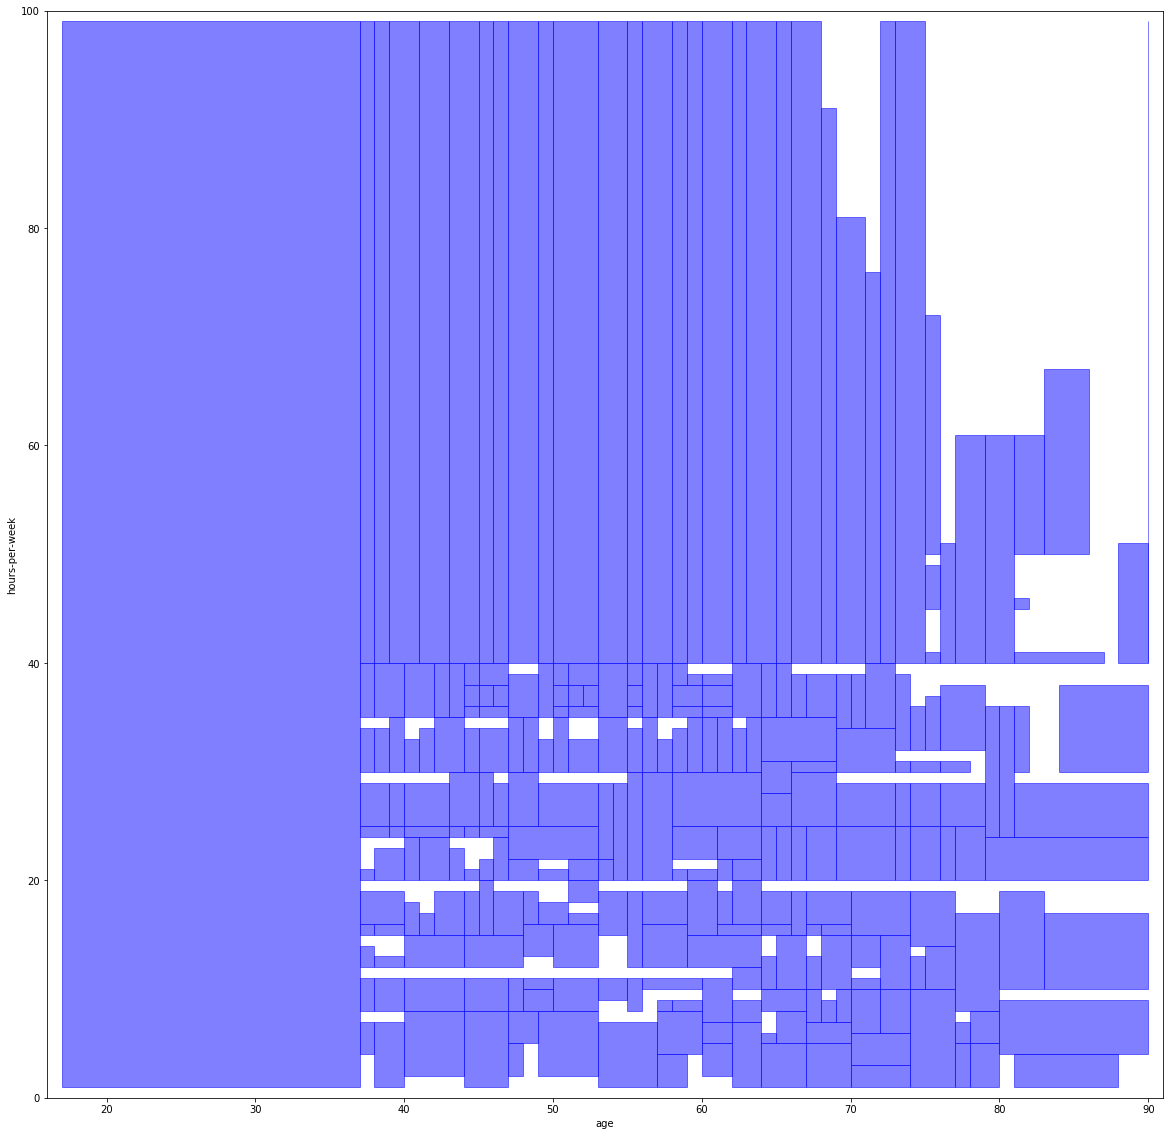

In [ ]:
pl.figure(figsize=(20,20))
ax = pl.subplot(111)
plot_rects(df, ax, t_close_rects, column_x, column_y, edgecolor='b', facecolor='b')

## Exercise

**Brifely analyze the result we get. Compare with simple l-diversity and simple k-anonymity**

Ce qui saute aux yeux c'est la partition de (22 746 + 2 948) individus d'âge moyen 27.19 ans et 38.97 heures travaillées par semaine. Si le but est d'anonymiser, cela semble convenir, sous réserve des futures attaques possibles.
En revanche, ce grand groupe fait perdre de l'information et donc de la précision, et les analyses sur ces données pourraient en pâtir.

La T-clossness apporte une couche supplémentaire d'anonymisation, plus pertinente que la L-diversity ou la K-anonymity seule. En effet, elle respecte la distribution des attributs dans chaque sous groupe sur les données sensibles, par rapport à la distribution globale.

Fin.

